In [93]:
import matplotlib.pyplot as plt
import numpy as np

In [94]:
rng = np.random.default_rng(0)
d = 6  # simulated dimensionality (including flexor bias)
Nf, Nd = 5, 3  # 5 fingers, 3 channels/finger
N = Nf * Nd  # N channels
T = 200  # trial duration

In [95]:
# make a mixing matrix that maps (d-1)-dimensional latent profiles onto N-dimensional force patterns
Aa = rng.standard_normal((N, d-1))
Aa = Aa / (np.linalg.norm(Aa, axis=0, keepdims=True) + 1e-12)

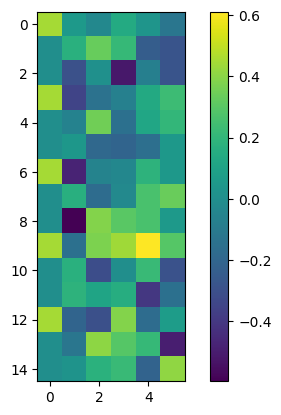

In [96]:
# Simulate flexor bias and add to the mixing matrix (flexion correspond to negative x direction)
flexCh = np.arange(0, N, Nd, dtype=int)
s = np.zeros(N)
bias = 1
s[flexCh] = bias
flexBias = s / np.linalg.norm(s)
A = np.c_[flexBias, Aa]
plt.imshow(A)
plt.colorbar()
plt.show()

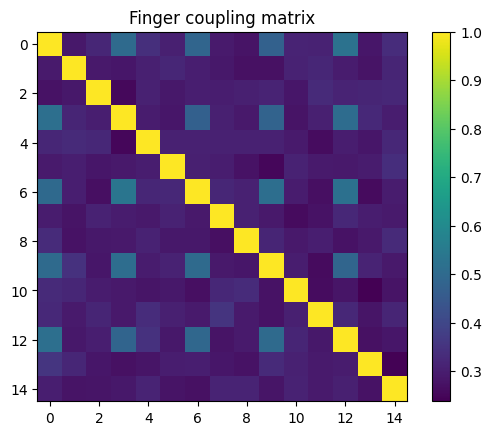

In [77]:
# set strength of enslaving
flexBias = np.outer(flexBias, flexBias.T)
coupling = .3
C = np.full((N, N), coupling, dtype=float)
C += 0.02 * rng.standard_normal((N, N))
C += flexBias
np.fill_diagonal(C, 1.0)
plt.imshow(C)
plt.title('Finger coupling matrix')
plt.colorbar()
plt.show()

In [81]:
# Create a force profile
t = np.linspace(0, 1, T)
profile = np.sin(np.pi * t) ** 2
B = rng.standard_normal((Nf, Nd, d))
B[:, :, 0] *= (1. + bias)

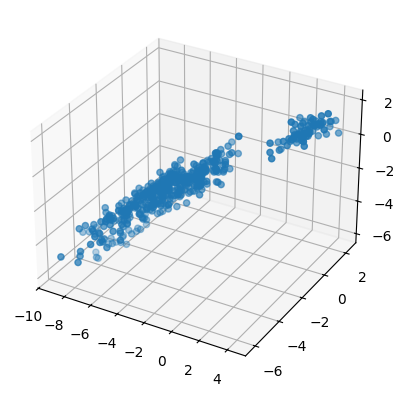

In [91]:
# example trials
ntrials = 100
Ft_peak = np.zeros((ntrials, N))
for ntrial in range(ntrials):
    f = rng.integers(0, Nf)          # which finger is instructed
    v = np.array([1, 0, 0], dtype=float)       # movement direction in 3D
    v /= (np.linalg.norm(v) + 1e-12)
    amp = 1 + .2 * rng.standard_normal() # movement amplitude
    z_vec = v[0] * B[f, 0] + v[1] * B[f, 1] + v[2] * B[f, 2] # (d,)
    Z = (amp * profile)[:, None] * z_vec[None, :] # (T, d)
    X = Z @ A.T
    noise=.3
    X += noise * rng.standard_normal(X.shape)
    Ft = X @ C.T
    Ft_peak[ntrial] = Ft[T // 2]

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.scatter(Ft_peak[:, ::3], Ft_peak[:, 1::3], Ft_peak[:, 2::3])

plt.show()